#Лабораторна робота №6
#Завдання 1. Побудова регресійної моделі та запобігання перенавчанню.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
#Завантаження датасету California Housing
data = fetch_california_housing()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Поділ даних на тренувальну і тестову вибірки.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Побудова базової лінійної регресійної моделі.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

#Оцінка базової моделі.
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Базова модель (Лінійна регресія):")
print(f"Навчальні дані: MSE = {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"Тестові дані: MSE = {test_mse:.2f}, R^2 = {test_r2:.2f}")

Базова модель (Лінійна регресія):
Навчальні дані: MSE = 0.52, R^2 = 0.61
Тестові дані: MSE = 0.56, R^2 = 0.58


In [ ]:
#Запобігання перенавчанню з використанням регуляризації.
alphas = np.logspace(0, 4, 100)  #Діапазон значень для параметра регуляризації.

#Ridge Regression.
ridge_cv_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    scores = cross_val_score(ridge_model, X, y, cv=5, scoring = 'neg_mean_squared_error')
    ridge_cv_scores.append(-scores.mean())

#Lasso Regression.
lasso_cv_scores = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    scores = cross_val_score(lasso_model, X, y, cv=5, scoring = 'neg_mean_squared_error')
    lasso_cv_scores.append(-scores.mean())

#Вибір кращих моделей за допомогою перехресної валідації.
best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Найкраще значення alpha для Ridge: {best_ridge_alpha}")
print(f"Найкраще значення alpha для Lasso: {best_lasso_alpha}")

Найкраще значення alpha для Ridge: 72.20809018385468
Найкраще значення alpha для Lasso: 1.0


In [ ]:
#Переоцінка моделей на тестових даних.
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_y_test_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
lasso_y_test_pred = lasso_model.predict(X_test)

#Оцінка моделей з регуляризацією.
ridge_test_mse = mean_squared_error(y_test, ridge_y_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_y_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_y_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_y_test_pred)

print(f"Ridge Regression: MSE = {ridge_test_mse:.2f}, R^2 = {ridge_test_r2:.2f}")
print(f"Lasso Regression: MSE = {lasso_test_mse:.2f}, R^2 = {lasso_test_r2:.2f}")

Ridge Regression: MSE = 0.55, R^2 = 0.58
Lasso Regression: MSE = 0.94, R^2 = 0.28


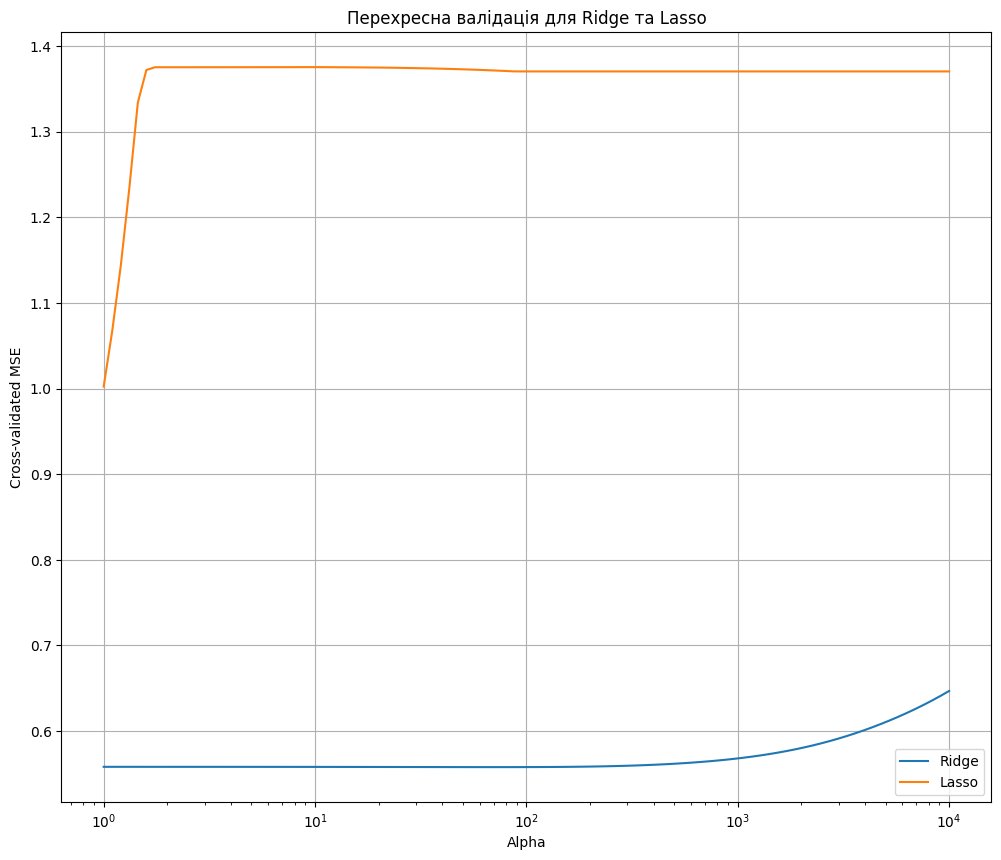

In [ ]:
#Візуалізація результатів регуляризації.
plt.figure(figsize=(12, 10))
plt.semilogx(alphas, ridge_cv_scores, label='Ridge')
plt.semilogx(alphas, lasso_cv_scores, label='Lasso')
plt.xlabel('Alpha')
plt.ylabel('Cross-validated MSE')
plt.title('Перехресна валідація для Ridge та Lasso')
plt.legend()
plt.grid(True)
plt.show()

Висновок: У даній роботі була побудована регресійна модель на основі вбудованого датасету California Housing, також виконано запобігання перенавчанню моделі за допомогою регуляризацій L1 (Lasso) та L2 (Ridge). На основі отриманих результатів, можна зробити висновок, що регуляризація Lasso забезпечує значне покращення показників точності моделі.

#Завдання 2. Кластеризація даних в датасеті Student Data.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Виведення перших рядків датасету.
file_path = '/content/drive/My Drive/Student_data(in).csv'
df = pd.read_csv(file_path)
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


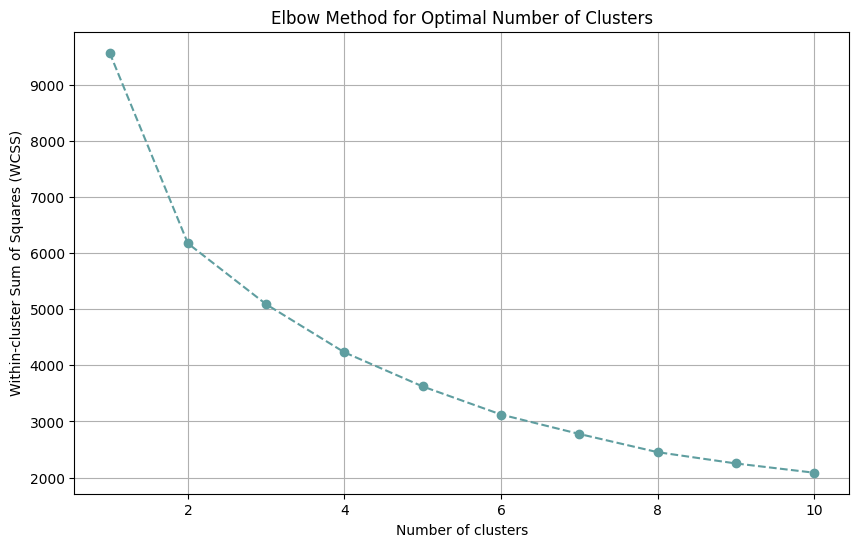

In [ ]:
#Вибір числових стовпців для кластеризації.
features = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

#Масштабування даних.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

#Застосування ліктевого методу для визначення оптимальної кількості кластерів.
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

#Візуалізація графіка ліктевого методу.
plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--', color = 'cadetblue')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

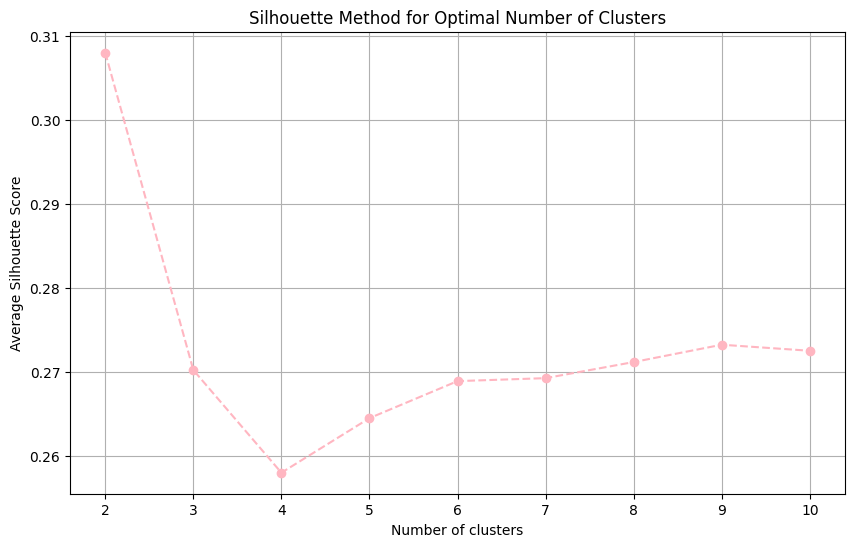

In [ ]:
#Застосування методу силуетів для визначення оптимальної кількості кластерів.
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
  cluster_labels = kmeans.fit_predict(X_scaled)
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  silhouette_scores.append(silhouette_avg)

#Візуалізація графіка методу силуетів.
plt.figure(figsize = (10, 6))
plt.plot(range(2, 11), silhouette_scores, marker = 'o', linestyle = '--', color = 'lightpink')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()

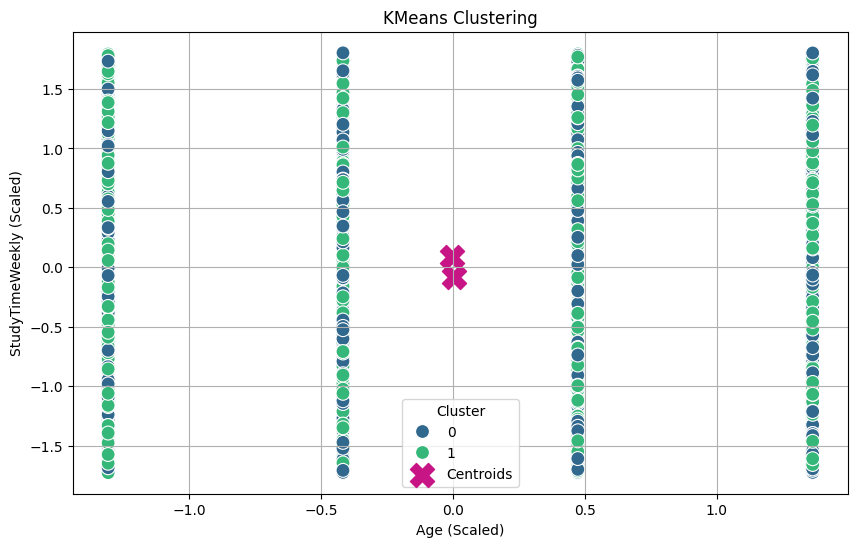

In [ ]:
#Візуалізація кластерів.
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
clusters = kmeans.fit_predict(X_scaled)

#Візуалізація кластерів за допомогою двох перших ознак.
plt.figure(figsize = (10, 6))
sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:, 1], hue = clusters, palette = 'viridis', legend = 'full', s = 100)

#Додавання центроїдів кластерів.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'mediumvioletred', label = 'Centroids', marker = 'X')

#Візуалізація графіка.
plt.title('KMeans Clustering')
plt.xlabel('Age (Scaled)')
plt.ylabel('StudyTimeWeekly (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Висновок: В завданні було виконано кластеризацію даних із датасету Student Data за допомогою ліктьового та силуетного методів, а також проведено візуалізацію кластерів. Обидва методи вказали, що оптимальна кількість кластерів становить два, що підтверджується отриманими результатами та візуальними відображеннями кластерів.